## Regressão Linear

In [444]:
import pyprind
import tensorflow as tf 
import matplotlib.pyplot as plt

### Regressão Linear Simples

In [445]:
# Your dataset
altura      = tf.constant(
    value = [1.087, 1.613, 0.953, 1.003, 1.156, 0.978, 1.092, 0.572, 0.940, 0.597, 0.838, 1.473], 
    name  ='Altura',
    dtype = tf.float32
)
comprimento = tf.constant(
    value = [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47], 
    name  ='Comprimento',
    dtype = tf.float32
)

In [446]:
altura = tf.reshape(altura, [-1, 1])
comprimento = tf.reshape(comprimento, [-1, 1])

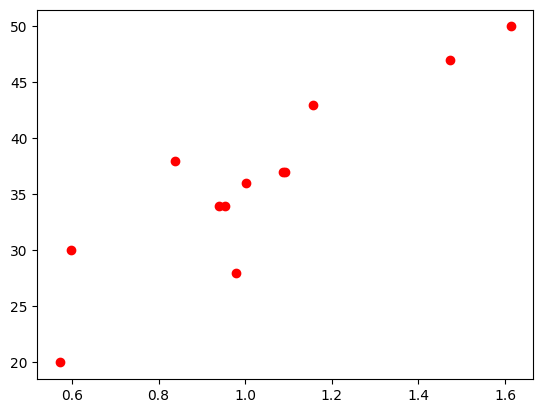

In [447]:
plt.plot(altura, comprimento, 'ro')
plt.show()

• A coluna Altura é a entrada do nosso modelo.

• A coluna Comprimento é a sa ́ıda do nosso modelo.

• Nosso conjunto de dados é formado por 12 alturas e 12
comprimentos correspondentes.

• Matematicamente, temos:
$D = \{(x1,y1),··· ,(x2,y2)\}= \{(xi ,yi )\}_{12i}=1$,
em que $x_i$  ́e a i - ́esima entrada e yi  ́e a i-ésima sa ́ıda.

• Objetivo: Encontrar uma relação entre xi e yi que forne ̧ca uma
predicao $\bar yi$ o mais proximo poss ́ıvel da saida real y

#### Modelo
$$y_i =  w_0 + w_1 x_i$$

> Queremos minimizar error do valor real e valor predito

$$ J = \min_{w_0, w_1} \frac{1}{2N} \sum^N_{i=1}(y_i - (w_0 + w_1 x_i))^2$$

> Para minimizar o error quadrático médio do valor predito e real será feito o metodo da descida o gradiente, para tal derivamos em relação a $w_0$ e $w_1$

Para achar o minimo derivamos essa função objetivos

* **Para $w_0$**

$\large \frac{\partial J}{\partial w_0}$

$\frac{\partial J}{\partial w_0} = \frac{\partial}{\partial w_0}\frac{1}{2N} \sum^N_{i=1}(y_i - (w_0 + w_1 x_i))^2$

$\frac{\partial J}{\partial w_0} =  2\frac{1}{2N} \sum^N_{i=1}(y_i - (w_0 + w_1 x_i))(-1), \text{corta o 2}$

$\frac{\partial J}{\partial w_0} =  \frac{1}{N} \sum^N_{i=1}(y_i - (w_0 + w_1 x_i))(-1)$


$\frac{\partial J}{\partial w_0} =  \frac{1}{N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)(-1)$


$\frac{\partial J}{\partial w_0} =  -1\cdot\frac{1}{N} \sum^N_{i=1}(y_i - w_0 - w_1x_i)$

$E_{w_0} = \frac{\partial J}{\partial w_0}$

* **Para $w_1$**

$\large \frac{\partial J}{\partial w_1}$

$\frac{\partial J}{\partial w_1} = \frac{\partial}{\partial w_0}\frac{1}{2N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)^2$

$\frac{\partial J}{\partial w_1} =  2\frac{1}{2N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)(-w_1), \text{corta o 2}$

$\frac{\partial J}{\partial w_1} =  \frac{1}{N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)(-1*w_1)$

$\frac{\partial J}{\partial w_1} =  -\frac{1}{N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)(x_i)$

$E_{w1} = \frac{\partial J}{\partial w_1}$

&nbsp;

In [448]:
def erro_quadratico_medio(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

#### Gradiente descedente(GD)

```pseudo
alpha <- define (0.01 geralmente)
w_0   <- inicia aleatoriamente
w_0   <- inicia aleatoriamente
loss  <- loss_fn(ytrue, ypred) 

PARA I EM 1 ATÉ MAX_ITER:
    w_0 <- w_0 + alpha * E_w0 
    w_1 <- w_1 + alpha * E_w1

    loss <- loss_fn(ytrue, ypred) 
```

In [449]:
class modelo_simples(tf.Module):
    def __init__(self, name='modelo_1', features=1, seed=32):
        super().__init__(name)
        # Seed 
        tf.random.set_seed(seed)

        self.interceptor = tf.Variable([0.0], name='interceptor', dtype=tf.float32, trainable=True)
        self.coeficiente = tf.Variable(tf.random.uniform(shape=[1, features]), name='coeficiente', dtype=tf.float32, trainable=True)
    
    def __call__(self, X):
        return tf.matmul(X, self.coeficiente, transpose_b=True) + self.interceptor
    
    def summary(self):
        return f'Intercept: {self.interceptor.numpy().tolist()} | Coeficiente: {self.coeficiente.numpy().tolist()}'

In [490]:
def gradiente(x, y, model, learning_rate=0.01, epochs=1000, loss=erro_quadratico_medio, salvar_perda = False):
    pgbar = pyprind.ProgBar(epochs, title=model.name, monitor=True)

    perda = []

    for epoch in range(epochs):
        ypred = model(x)

        # Atualizando pesos
        # Atualizando o coeficiente : w = w + lr * np.mean((y - w * x) * x)
        model.coeficiente = model.coeficiente + learning_rate * tf.reduce_mean((y - ypred) * x , axis=0)

        # Atualizando o intercept : w = w + lr * np.mean(y - w * x) 
        model.interceptor = model.interceptor + learning_rate * tf.reduce_mean(y - ypred)

        pgbar.update(1, item_id=f'Epoch {epoch} - Loss: {loss(y, ypred):.5f}')
        
        if salvar_perda:
            perda.append(loss(y, ypred))
    
    return model if not salvar_perda else (model, perda)

In [491]:
model = modelo_simples(name = 'modelo_1', features = 1)

In [492]:
model, perda = gradiente(x=altura, y=comprimento, model=model, epochs=1_00, salvar_perda=True)

modelo_1
0% [##############################] 100% | ETA: 00:00:00 | Item ID: Epoch 99 - Loss: 34.495155
Total time elapsed: 00:00:01


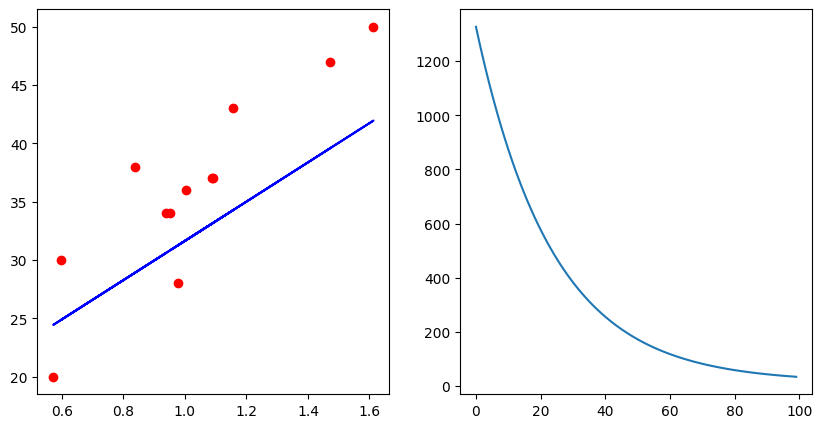

In [493]:
fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(10, 5) )

ax[0].plot(altura, comprimento, 'ro')
ax[0].plot(altura, model(altura), 'b')

ax[1].plot(perda)
plt.show()

In [453]:
model.summary()

'Intercept: [14.824074745178223] | Coeficiente: [[16.823469161987305]]'

&nbsp;

#### Gradiente descendente Estocatico(SGD)

```pseudo
Gradiente descendente Estocatico

alpha <- define (0.01 geralmente)
w_0   <- inicia aleatoriamente
w_0   <- inicia aleatoriamente
loss  <- loss_fn(ytrue, ypred) 

PARA I EM 1 ATÉ MAX_EPOCAS:
    XI <- X(PERMUTAÇÃO)
    YI <- Y(PERMUTAÇÃO)
    PARA J EM 1 ATÉ N_INSTANCIA:
        w_0 <- w_0 + alpha * Ei_w0
        w_1 <- w_1 + alpha * Ei_w1(xi)

    loss <- loss_fn(ytrue, ypred) 

```

In [ ]:
def gradiente_descedente_estocatico(x, y, model, learning_rate=0.01, epochs=1000, loss=erro_quadratico_medio, salvar_perda = False):
    pgbar = pyprind.ProgBar(epochs//2, title=model.name, monitor=True)
    perda = []
    indices = tf.range(start=0, limit=len(x), delta=1)
    for i in range(epochs):
        # Embaralhando os dados
        embaralhar = tf.random.shuffle(indices)
      

        # Atualizando pesos
        for index in embaralhar:

            xi_ = tf.reshape(x[index, :], [1, -1])
            yi_ = y[index]
            pred = model(xi_)

            # Atualizando pesos
            # Atualizando o coeficiente : w = w + lr * np.mean((y - w * x) * x)
            model.coeficiente = model.coeficiente + learning_rate * (yi_ - pred) * xi_

            # Atualizando o intercept : w = w + lr * np.mean(y - w * x) 
            model.interceptor = model.interceptor + learning_rate * (yi_ - pred)

        pgbar.update(1, item_id=f'Epoch {i} - Loss: {loss(y, pred):.5f}')
        
        if salvar_perda: perda.append(loss(y, pred))
 

    return model if not salvar_perda else (model, perda)

In [486]:
model = modelo_simples(name='modelo_1', features=altura.shape[1])

In [487]:
model, perda = gradiente_descedente_estocatico(x=altura, y=comprimento, model=model, epochs=1_0, salvar_perda=True)

modelo_1
0% [#####] 100% | ETA: 00:00:00 | Item ID: Epoch 4 - Loss: 322.66171
Total time elapsed: 00:00:00


In [456]:
model.coeficiente, model.interceptor

(<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[17.674679]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[15.416361]], dtype=float32)>)

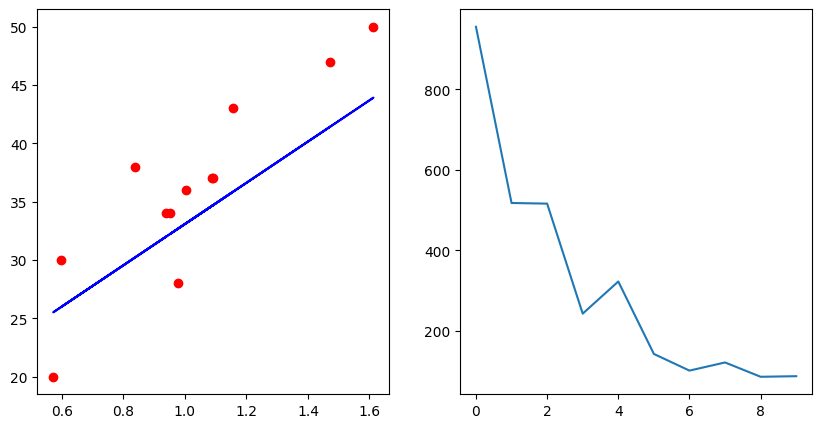

In [457]:
fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(10, 5) )

ax[0].plot(altura, comprimento, 'ro')
ax[0].plot(altura, model(altura), 'b')

ax[1].plot(perda)
plt.show()

In [458]:
sgd = gradiente_descedente_estocatico(
    tf.concat([altura, altura**2], axis=1), comprimento, epochs=10
)

modelo_1


0% [#####] 100% | ETA: 00:00:00 | Item ID: Epoch 4 - Loss: 388.06754
Total time elapsed: 00:00:01


&nbsp;

----------------


### Usando tape do tensorflow

In [459]:
import keras

In [483]:
def fit(x, y, model, learning_rate=0.01, epochs=1000, optimizer='sgd', loss=erro_quadratico_medio, salvar_perda = False):

    optim = None 
    
    pgbar = pyprind.ProgBar(epochs//2, title=model.name, monitor=True)
    
    match optimizer:
        case 'sgd' : optim = keras.optimizers.SGD(learning_rate=learning_rate)
        case 'adam': optim = keras.optimizers.Adam(learning_rate=learning_rate)
        case _ : optim = keras.optimizers.SGD(learning_rate=learning_rate)
    
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            ypred = model(x)
            loss_ = loss(y, ypred)

        # Atualizando pesos
        grad = tape.gradient(loss_, model.trainable_variables)

        # Atualizando o coeficiente : w = w + lr * np.mean((y - w * x) * x)
        optim.apply_gradients(zip(grad, model.trainable_variables))

        pgbar.update(1, item_id=f'Epoch {epoch} - Loss: {loss(y, ypred):.5f}')
        
        if salvar_perda:
            perda.append(loss(y, ypred))
    
    return model if not salvar_perda else (model, perda)

In [461]:
model, perda = fit(x=altura, y=comprimento, epochs=1_00, salvar_perda=True)

modelo_1
0% [##############################] 100% | ETA: 00:00:00 | Item ID: Epoch 49 - Loss: 34.446621
Total time elapsed: 00:00:02


In [462]:
model.summary()

'Intercept: [16.43293571472168] | Coeficiente: [[18.969268798828125]]'

In [463]:
model.trainable_variables

(<tf.Variable 'coeficiente:0' shape=(1, 1) dtype=float32, numpy=array([[18.969269]], dtype=float32)>,
 <tf.Variable 'interceptor:0' shape=(1,) dtype=float32, numpy=array([16.432936], dtype=float32)>)

## Regressão Multipla

In [464]:
peso = tf.constant(
    value=[18.141, 42.404, 16.100, 13.605, 23.583, 7.710, 
           17.460, 3.855, 14.966, 4.308, 9.524, 35.828],
    name='Peso',
    dtype=tf.float32
)
peso = tf.reshape(peso, [-1, 1])

In [465]:
class regressao_multipla(tf.Module):
    def __init__(self, name='modelo_1'):
        super().__init__(name)
        # Coeficientes
        self.params = None


    def OLS(self, x, y):     
        # Adicionando uma coluna de 1 = interceptor
        ones = tf.reshape(tf.ones_like(x[:, 0]), [-1, 1])
        Xi   = tf.concat([ones, x], axis=1)

        # (X^T X)^-1 
        P1 = tf.matmul( a=Xi, b=Xi, transpose_a=True)
        P2 = tf.linalg.inv(P1)

        # inv * x^T * y
        self.params = tf.matmul(P2, tf.matmul(Xi, y, transpose_a=True))

        return self
    
    def __call__(self, x):
        xi = tf.reshape(tf.ones_like(x[:, 0]), [-1, 1])
        xi = tf.concat([xi, x], axis=1)
        return tf.matmul(xi, self.params)

In [466]:
X = tf.concat([altura, peso], axis=1)
Y = comprimento

In [467]:
model = regressao_multipla()
model.OLS(tf.reshape(X[:, 0], [-1, 1]), Y)

In [468]:
model.params

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[11.47345 ],
       [24.087006]], dtype=float32)>

In [469]:
erro_quadratico_medio(Y, pred)

<tf.Tensor: shape=(), dtype=float32, numpy=10.713692665100098>

-----

## Normalizacao

In [470]:
class Normalizacao:
    def __init__(self, X):
        # Inicializa os atributos
        self.desvios_padroes = None
        self.medias          = None
        self.x = X
        self.size = self.x.shape[1]

    # Função para calcular a média de cada coluna
    def mean_(self):
        # Calcula a média de cada coluna
        self.medias = [ tf.round(tf.reduce_mean(self.x[:, i]), 2) for i in range(self.size)]

        # Retorna o próprio objeto
        return self

    def std_(self):
        # Calcula a média
        self.mean_()

        # Calcula o desvio padrão de cada coluna
        self.desvios_padroes = [
            tf.math.sqrt(tf.reduce_mean( (self.x[:, i] - self.medias[i])**2) ) for i in range(self.size)
        ]
        return self

    def transformacao(self):
        # Chamando funções para calcular média e desvio padrão
        self.std_()
        # Aplica a normalização z-score
        self.x = (self.x - self.medias) / self.desvios_padroes
        return self.x

    def inversa_transformacao(self):
        try:
            return tf.multiply(self.desvios_padroes, self.x)  + self.medias
        except Exception as e:
            print("talvez você não normalizou os dados ainda")
        return self.x